## **SOLO LO HICE PARA PCA**

In [1]:
from scripts.cargar_datos_cifar import clases_cifar
from scripts.ver_umap import visualizar_umap

# **PATHS**

In [2]:
from pathlib import Path

cifar100_path = Path("../datos/cifar-10-batches-py")
resultados_path = Path("../resultados/UMAP")

# **CLASES E HIPERPARÁMETROS**

In [3]:
clases = ['bird', 'automobile', 'cat', 'deer']

In [ ]:
epochs_to_test = [50, 250, 500, 1000, 3000]
neighbors_to_test = [5, 30, 100, 300, 500]

# **CORRERLO**

In [5]:
X, y, fine_label_names, data_dict, meta_dict = clases_cifar(cifar100_path, clases)

In [6]:
import os
import matplotlib.pyplot as plt
import umap.umap_ as umap
import seaborn as sns
import pandas as pd
import time

/home/heri/miniconda3/envs/a/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/heri/miniconda3/envs/a/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/heri/miniconda3/envs/a/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/heri/miniconda3/envs/a/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/heri/miniconda3/envs/a/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings

FileNotFoundError: [Errno 2] No such file or directory: '../resultados/UMAP/comparacion_epochs_neighbors_3.svg'

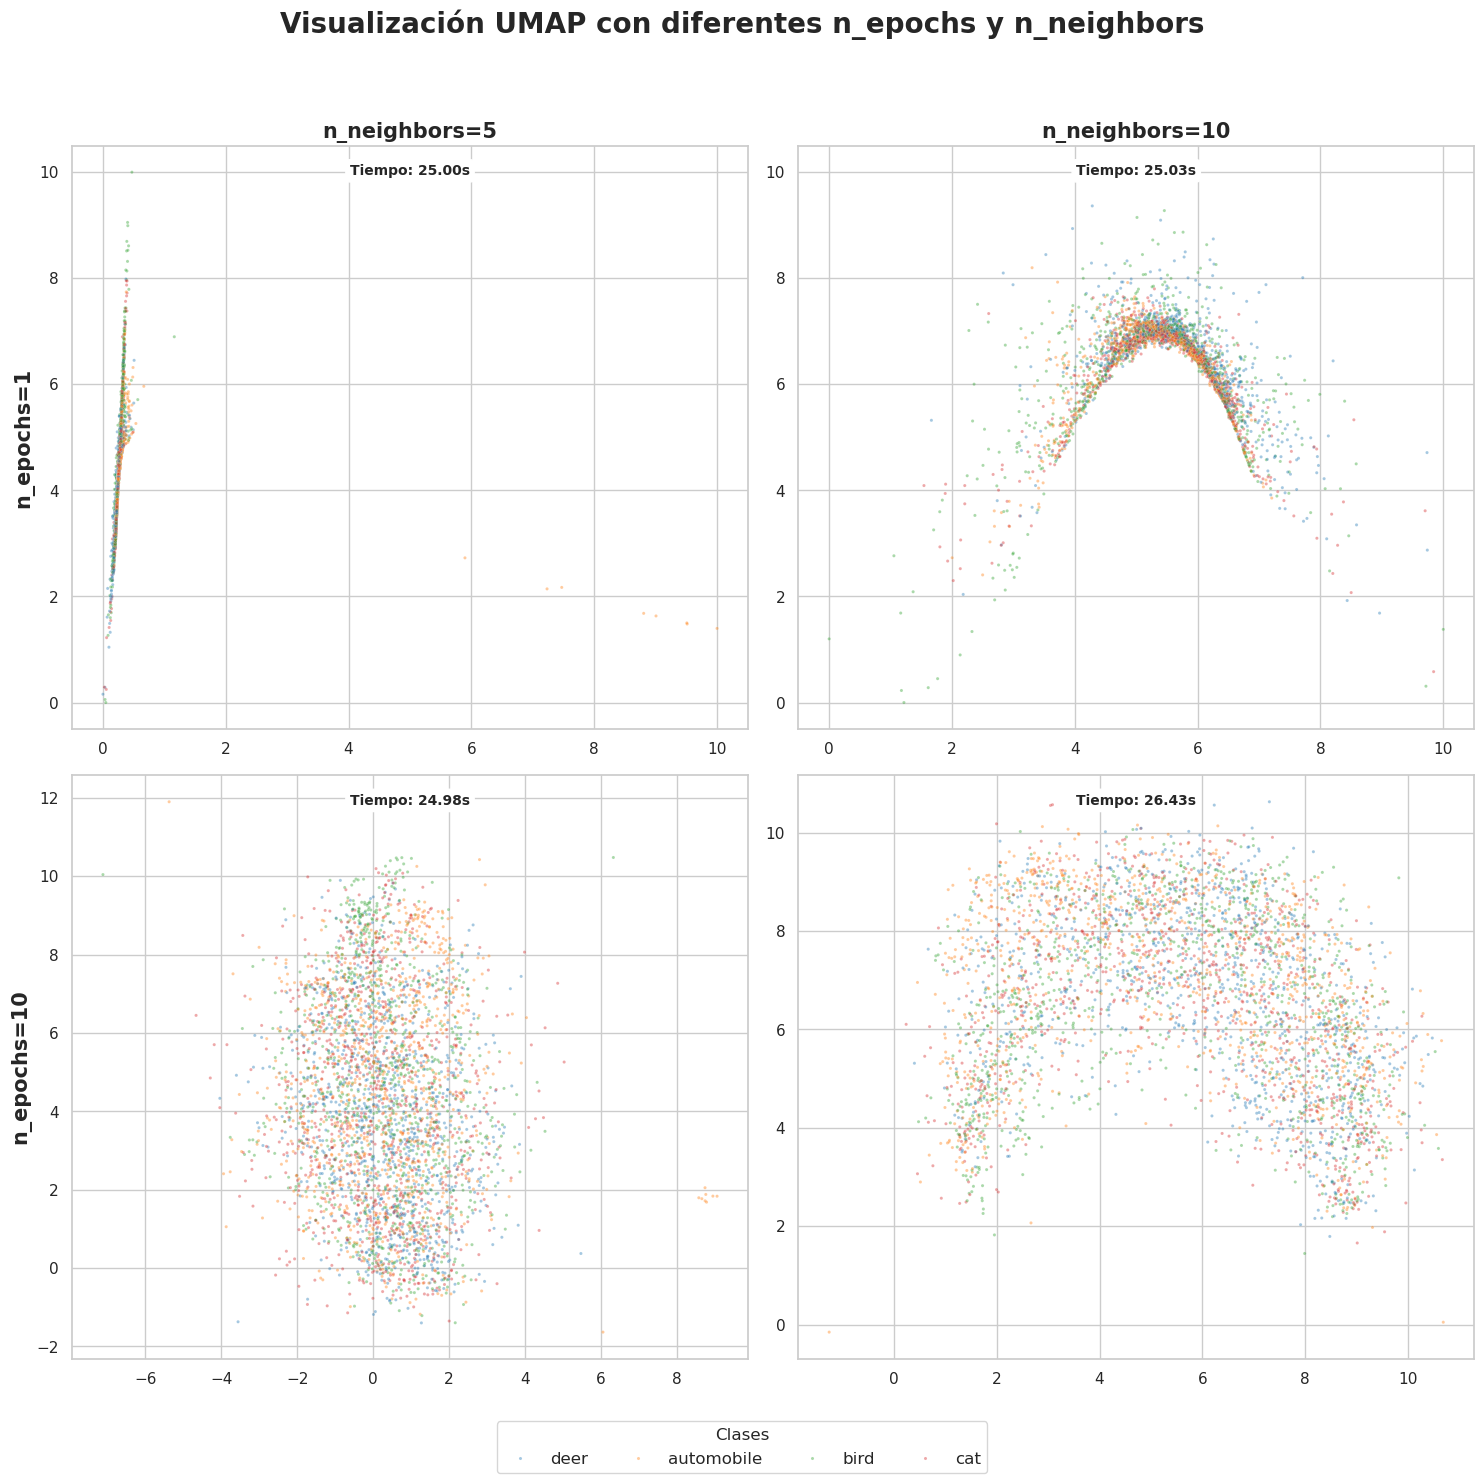

In [ ]:
fig, axes = plt.subplots(len(epochs_to_test), len(neighbors_to_test), figsize=(20, 20))
fig.suptitle('Visualización UMAP con diferentes n_epochs y n_neighbors', fontsize=25, weight='bold')

for i, n_epochs in enumerate(epochs_to_test):
    for j, n_neighbors in enumerate(neighbors_to_test):

        # Iniciar el cronómetro
        start_time = time.time()

        # Crear un pipeline con UMAP
        umap_model = umap.UMAP(
            n_components=2,
            n_neighbors=n_neighbors,
            min_dist=0.05,
            metric="euclidean",
            n_epochs=n_epochs,
            spread=1.0,
            learning_rate=1.5,
            random_state=8
        )

        # Ajustar el modelo UMAP a los datos
        X_umap_2 = umap_model.fit_transform(X)

        # Detener el cronómetro
        end_time = time.time()
        execution_time = end_time - start_time

        # Crear un DataFrame para la visualización
        df_umap = pd.DataFrame({
            'x_1': X_umap_2[:, 0],
            'x_2': X_umap_2[:, 1],
            'Clase': [fine_label_names[k] for k in y]
        })

        # Crear un gráfico de dispersión
        ax = axes[i, j]
        sns.scatterplot(
            data=df_umap,
            x='x_1',
            y='x_2',
            hue='Clase',
            alpha=0.4,
            ax=ax,
            s=5
        )

        # Configurar el gráfico
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend().set_visible(False)
        ax.grid(True)
        # ax.set_xlim(-6, 12)
        # ax.set_ylim(-4, 12)

        # Añadir el tiempo de ejecución al gráfico
        ax.annotate(
            f"Tiempo: {execution_time:.2f}s",
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            ha='center',
            fontsize=12,
            weight='bold',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='white')
        )


# Añadir etiquetas en los bordes para mejor claridad
for ax, neighbors in zip(axes[0, :], neighbors_to_test):
    ax.set_title(f'n_neighbors={neighbors}', fontsize=18, weight='bold')
for ax, epochs in zip(axes[:, 0], epochs_to_test):
    ax.set_ylabel(f'n_epochs={epochs}', fontsize=18, weight='bold')

# Añadir una leyenda común al final
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(fine_label_names), fontsize=12, bbox_to_anchor=(0.5, -0.001), bbox_transform=fig.transFigure, title="Clases")


plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajustar para que no se superpongan los títulos y la leyenda

# Guardar la figura
plt.savefig(os.path.join(resultados_path, 'comparacion_epochs_neighbors_3.svg'), format='svg')

plt.show()